<a href="https://colab.research.google.com/github/SaikatGhosh94/MachineLearningCourse/blob/main/Hands_on_practice/simple_linear_regression/05_Regression_model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dealing with outliers:

In [208]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [209]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [211]:
#drop id column
df = df.drop('PID',axis=1)

In [212]:
df.corr(numeric_only=True)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,-0.054129,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914
BsmtFin SF 2,-0.070946,0.045999,0.083150,-0.041287,0.041134,-0.027415,-0.062129,-0.016019,-0.054129,1.000000,...,0.098528,-0.005587,0.032380,-0.023325,0.062951,0.044398,-0.005204,-0.009484,0.007105,0.005891


In [213]:
#check correlation with SalePrice which is the label column
df.corr(numeric_only=True)['SalePrice'].sort_values()

,SalePrice
Enclosed Porch,-0.128787
Kitchen AbvGr,-0.119814
Overall Cond,-0.101697
MS SubClass,-0.085092
Low Qual Fin SF,-0.037660
Bsmt Half Bath,-0.035835
Yr Sold,-0.030569
Misc Val,-0.015691
BsmtFin SF 2,0.005891
3Ssn Porch,0.032225


Gr Liv Area and Overall Qual have the highest correlation

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000'),
  Text(700000.0, 0, '700000'),
  Text(800000.0, 0, '800000')])

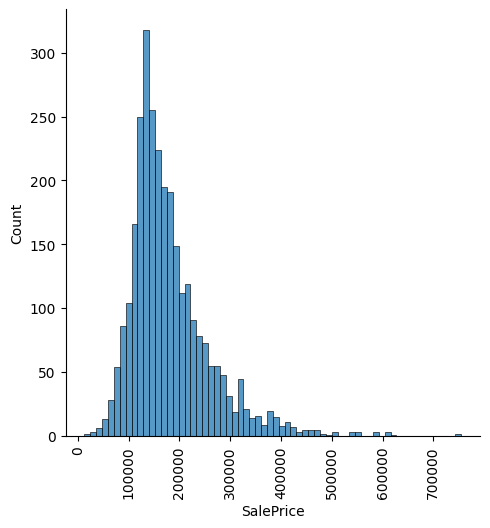

In [214]:
sns.displot(data=df, x='SalePrice')
plt.xticks(rotation=90)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

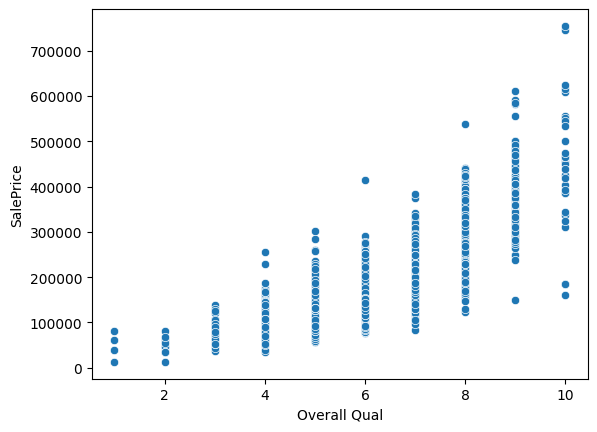

In [215]:
sns.scatterplot(data=df, x = 'Overall Qual',y='SalePrice')

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

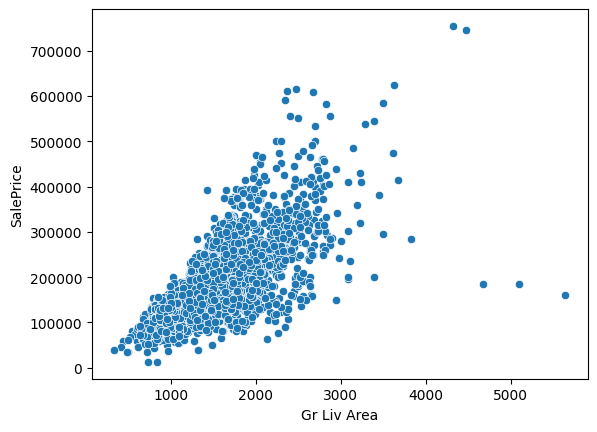

In [216]:
sns.scatterplot(data=df, x= 'Gr Liv Area', y='SalePrice')

In [217]:
#identify outlier for Overall Qual
drop_outlier_Overall_Qual = df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

In [218]:
drop_outlier_Overall_Qual

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [219]:
#identify outlier for Gr Liv Area
drop_outlier_Area = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)]

In [220]:
drop_outlier_Area

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [221]:
df=df.drop(drop_outlier_Overall_Qual.index,axis=0)

In [222]:
df.to_csv("Ames_Housing_outlier_removed.csv")

Dealing with missing data

In [223]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [224]:
df.isnull().sum()

,0
MS SubClass,0
MS Zoning,0
Lot Frontage,489
Lot Area,0
Street,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [225]:
with open('Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [226]:
100 * df.isnull().sum()/len(df)

,0
MS SubClass,0.000000
MS Zoning,0.000000
Lot Frontage,16.712235
Lot Area,0.000000
Street,0.000000
...,...
Mo Sold,0.000000
Yr Sold,0.000000
Sale Type,0.000000
Sale Condition,0.000000


In [227]:
def percent_missing(df):
  percent_nan = 100 * df.isnull().sum()/len(df)
  percent_nan = percent_nan[percent_nan>0].sort_values()
  return percent_nan

In [228]:
percent_nan = percent_missing(df)

In [229]:
percent_missing(df)

,0
Total Bsmt SF,0.034176
Bsmt Unf SF,0.034176
BsmtFin SF 2,0.034176
Electrical,0.034176
BsmtFin SF 1,0.034176
Garage Area,0.034176
Garage Cars,0.034176
Bsmt Full Bath,0.068353
Bsmt Half Bath,0.068353
Mas Vnr Area,0.786056


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Total Bsmt SF'),
  Text(1, 0, 'Bsmt Unf SF'),
  Text(2, 0, 'BsmtFin SF 2'),
  Text(3, 0, 'Electrical'),
  Text(4, 0, 'BsmtFin SF 1'),
  Text(5, 0, 'Garage Area'),
  Text(6, 0, 'Garage Cars'),
  Text(7, 0, 'Bsmt Full Bath'),
  Text(8, 0, 'Bsmt Half Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Bsmt Qual'),
  Text(11, 0, 'Bsmt Cond'),
  Text(12, 0, 'BsmtFin Type 1'),
  Text(13, 0, 'BsmtFin Type 2'),
  Text(14, 0, 'Bsmt Exposure'),
  Text(15, 0, 'Garage Type'),
  Text(16, 0, 'Garage Qual'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Cond'),
  Text(19, 0, 'Garage Yr Blt'),
  Text(20, 0, 'Lot Frontage'),
  Text(21, 0, 'Fireplace Qu'),
  Text(22, 0, 'Mas Vnr Type'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

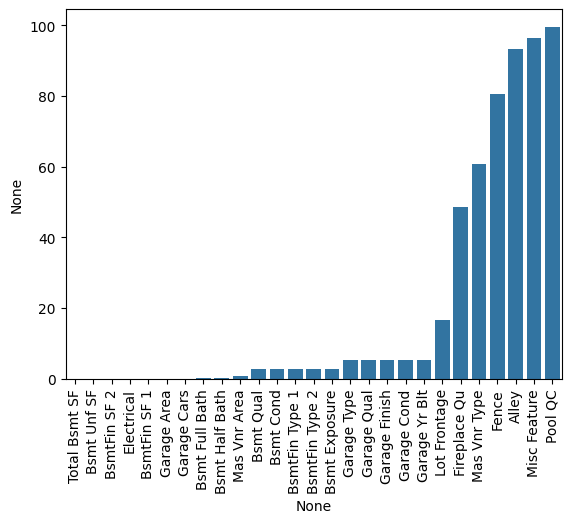

In [230]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [231]:
#find features with less than 1% missing data
percent_nan[percent_nan<1]

,0
Total Bsmt SF,0.034176
Bsmt Unf SF,0.034176
BsmtFin SF 2,0.034176
Electrical,0.034176
BsmtFin SF 1,0.034176
Garage Area,0.034176
Garage Cars,0.034176
Bsmt Full Bath,0.068353
Bsmt Half Bath,0.068353
Mas Vnr Area,0.786056


In [232]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [233]:
df[df['Garage Cars'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [234]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [235]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [236]:
df[df['Bsmt Unf SF'].isnull()][['Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1','Bsmt Full Bath','Bsmt Half Bath']]

,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,BsmtFin SF 1,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
df[['Bsmt Half Bath','Bsmt Full Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']]

,Bsmt Half Bath,Bsmt Full Bath,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,BsmtFin SF 1
0,0.0,1.0,1080.0,441.0,0.0,639.0
1,0.0,0.0,882.0,270.0,144.0,468.0
2,0.0,0.0,1329.0,406.0,0.0,923.0
3,0.0,1.0,2110.0,1045.0,0.0,1065.0
4,0.0,0.0,928.0,137.0,0.0,791.0
...,...,...,...,...,...,...
2925,0.0,1.0,1003.0,184.0,0.0,819.0
2926,0.0,1.0,864.0,239.0,324.0,301.0
2927,1.0,0.0,912.0,575.0,0.0,337.0
2928,0.0,1.0,1389.0,195.0,123.0,1071.0


In [238]:
#filling basement columns with 0 assuming no basement
numeric_bsmt_col = ['Bsmt Half Bath','Bsmt Full Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']
df[numeric_bsmt_col] = df[numeric_bsmt_col].fillna(0)

In [239]:
percent_nan = percent_missing(df)
percent_nan[percent_nan<1]

,0
Garage Area,0.034176
Garage Cars,0.034176
Electrical,0.034176
Mas Vnr Area,0.786056


In [240]:
percent_nan

,0
Garage Area,0.034176
Garage Cars,0.034176
Electrical,0.034176
Mas Vnr Area,0.786056
Bsmt Cond,2.734108
BsmtFin Type 1,2.734108
Bsmt Qual,2.734108
BsmtFin Type 2,2.768284
Bsmt Exposure,2.836637
Garage Type,5.365687


In [241]:
#filling basement string column with NA assuming no basement
str_bsmt_col = ['Bsmt Cond','BsmtFin Type 1','Bsmt Qual','BsmtFin Type 2','Bsmt Exposure']
df[str_bsmt_col] = df[str_bsmt_col].fillna('NA')

In [242]:
percent_nan = percent_missing(df)
percent_nan[percent_nan<1]

,0
Electrical,0.034176
Garage Cars,0.034176
Garage Area,0.034176
Mas Vnr Area,0.786056


In [243]:
percent_nan

,0
Electrical,0.034176
Garage Cars,0.034176
Garage Area,0.034176
Mas Vnr Area,0.786056
Garage Type,5.365687
Garage Finish,5.434040
Garage Qual,5.434040
Garage Yr Blt,5.434040
Garage Cond,5.434040
Lot Frontage,16.712235


(0.0, 1.0)

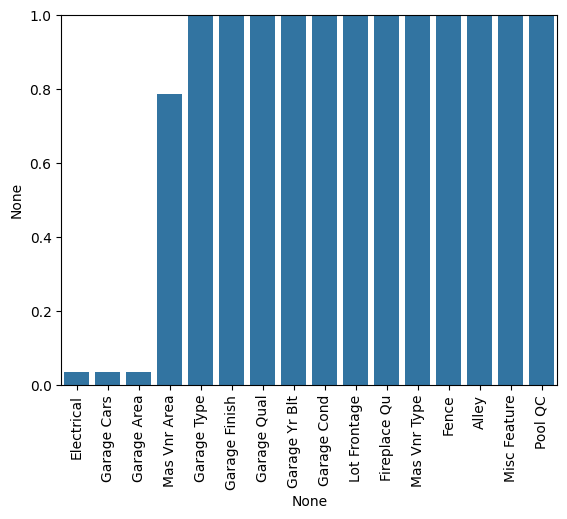

In [244]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

plt.ylim(0,1)

In [245]:
# drop columns with 1 row missing in electrical and garage area
df = df.dropna(axis=0, subset=['Electrical','Garage Area'])

In [246]:
percent_nan = percent_missing(df)
percent_nan[percent_nan<1]

,0
Mas Vnr Area,0.786594


In [247]:
df[df['Mas Vnr Type'].isnull()][['Mas Vnr Area','Mas Vnr Type']]

,Mas Vnr Area,Mas Vnr Type
1,0.0,NaN
3,0.0,NaN
4,0.0,NaN
6,0.0,NaN
7,0.0,NaN
...,...,...
2924,0.0,NaN
2925,0.0,NaN
2926,0.0,NaN
2927,0.0,NaN


In [248]:
#fill missing Mas Vin features
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna("None")
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [249]:
percent_nan = percent_missing(df)
percent_nan

,0
Garage Type,5.369357
Garage Qual,5.403557
Garage Finish,5.403557
Garage Yr Blt,5.403557
Garage Cond,5.403557
Lot Frontage,16.723666
Fireplace Qu,48.563611
Fence,80.471956
Alley,93.228454
Misc Feature,96.409029


In [250]:
df[df['Garage Type'].isnull()][['Garage Type','Garage Yr Blt','Garage Finish','Garage Cond','Garage Qual']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 27 to 2927
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    0 non-null      object 
 1   Garage Yr Blt  0 non-null      float64
 2   Garage Finish  0 non-null      object 
 3   Garage Cond    0 non-null      object 
 4   Garage Qual    0 non-null      object 
dtypes: float64(1), object(4)
memory usage: 7.4+ KB


In [251]:
#fill missing garage data
str_garage_col = ['Garage Type','Garage Finish','Garage Cond','Garage Qual']
df[str_garage_col] = df[str_garage_col].fillna("NA")

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [252]:
percent_nan = percent_missing(df)
percent_nan

,0
Lot Frontage,16.723666
Fireplace Qu,48.563611
Fence,80.471956
Alley,93.228454
Misc Feature,96.409029
Pool QC,99.589603


In [253]:
df[(df['Fireplace Qu'].isnull())][['Fireplace Qu','Fireplaces']]

,Fireplace Qu,Fireplaces
1,NaN,0
2,NaN,0
6,NaN,0
7,NaN,0
11,NaN,0
...,...,...
2921,NaN,0
2922,NaN,0
2925,NaN,0
2926,NaN,0


In [254]:
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("NA")

In [255]:
percent_nan = percent_missing(df)
percent_nan

,0
Lot Frontage,16.723666
Fence,80.471956
Alley,93.228454
Misc Feature,96.409029
Pool QC,99.589603


In [256]:
#drop columns with more than 80% data missing
df = df.drop(columns=['Fence','Alley','Misc Feature','Pool QC'])

In [257]:
percent_nan = percent_missing(df)
percent_nan

,0
Lot Frontage,16.723666


In [258]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [261]:
#this is tricky and requires domain knowledge to fill the Lot Frontage with avg Lot Frontage in the neighborhood and rest with 0
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : value.fillna(value.mean()))
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [262]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


Start first regression project

In [264]:
df = pd.read_csv("AMES_Final_DF.csv")

In [267]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB
